In [132]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [109]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active,2020-05-14_confirmed,2020-05-14_deaths,2020-05-14_recovered,2020-05-14_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,87.0,93.0,4.0,0.0,89.0,104.0,4.0,0.0,100.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,220.0,231.0,7.0,0.0,224.0,243.0,8.0,0.0,235.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,66.0,69.0,1.0,0.0,68.0,74.0,1.0,0.0,73.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,21.0,0.0,0.0,21.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,99.0,0.0,0.0,99.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [110]:
increase_bool = pd.read_csv('data/increase_bool.csv')
increase_bool

,FIPS,increase_week_prior,increase_day_prior,new_cases_past_week
0,1001,1,1,1
1,1003,1,1,1
2,1005,1,1,1
3,1007,1,0,1
4,1009,1,0,1
...,...,...,...,...
3137,56037,1,0,1
3138,56039,1,1,1
3139,56041,1,0,1
3140,56043,0,0,0


In [111]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,order_length,days_since_order,days_since_reopen,ann_to_eff,reopened,days_since_lifted,lifted
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,41,15,1,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-15,2020-05-01,1,1,14,0,1,0,1


In [112]:
sociohealth2 = pd.read_csv('data/sociohealth2.csv')
sociohealth2

,FIPS,population_density,%_below_poverty_line,%_disabled,%_minority,%multi_unit_housing,%_overcrowded,%_no_vehicle,%_group_quarters,%_fair_poor_health,...,%_uninsured,%_limited_english,%_clinton_votes_2016,%_trump_votes_2016,%_african_american,%_natamer_alaskan,%_asian,%_hawaii_pacisl,%_hisp,%_nonhisp_white
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,8.05,0.80,0.239569,0.734358,19.0,0.5,1.1,0.1,2.7,75.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,11.10,0.65,0.195653,0.773515,9.0,0.8,1.1,0.1,4.4,83.2
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,12.10,1.55,0.466603,0.522714,47.5,0.6,0.5,0.2,4.2,46.5
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,9.95,0.35,0.214220,0.769662,21.6,0.4,0.2,0.1,2.5,74.4
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,12.50,1.80,0.084699,0.898519,1.4,0.6,0.3,0.1,9.1,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,12.00,1.85,0.194046,0.729428,1.1,1.5,0.8,0.2,16.1,79.6
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,12.50,3.95,0.600608,0.321945,0.6,0.9,1.2,0.1,15.1,81.5
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,12.10,1.00,0.149261,0.764187,0.7,1.3,0.6,0.2,9.0,87.5
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,16.20,0.50,0.143203,0.783580,0.5,1.7,0.8,0.1,13.9,82.6


In [113]:
sociohealth2.columns

Index(['FIPS', 'population_density', '%_below_poverty_line', '%_disabled',
       '%_minority', '%multi_unit_housing', '%_overcrowded', '%_no_vehicle',
       '%_group_quarters', '%_fair_poor_health', '%_smokers', '%_obese',
       '%_physically_inactive', 'preventable_hospitalization_rate_medicare',
       'air_pollution', '%_unemployed', 'age_adjusted_mortality_rate',
       '%_diabetes', '%_insufficent_sleep', 'health_costs', 'med_house_income',
       'segregation_index', 'population', '%_female', 'percentage_rural',
       'pcp_rate', '%_65andup', '%_uninsured', '%_limited_english',
       '%_clinton_votes_2016', '%_trump_votes_2016', '%_african_american',
       '%_natamer_alaskan', '%_asian', '%_hawaii_pacisl', '%_hisp',
       '%_nonhisp_white'],
      dtype='object')

In [114]:
X1 = state_orders[['FIPS', 'order_length','days_since_order', 'days_since_reopen', 'reopened', 'lifted']]

In [115]:
X2 = increase_bool

In [117]:
X3 = sociohealth2[['FIPS', 'population_density', 'population', '%_65andup']]

In [118]:
Xa = pd.merge(X1, X2, how = 'left', on = 'FIPS')

In [119]:
X = pd.merge(Xa, X3, how = 'left', on = 'FIPS')

In [120]:
X.drop(columns = 'FIPS', inplace = True)

In [121]:
X['%_minority'] = sociohealth2['%_minority']

In [124]:
X['%_multiunit_housing'] = sociohealth2['%multi_unit_housing']

In [125]:
X['air_pollution'] = sociohealth2['air_pollution']

In [126]:
X

,order_length,days_since_order,days_since_reopen,reopened,lifted,increase_week_prior,increase_day_prior,new_cases_past_week,population_density,population,%_65andup,%_minority,air_pollution,%_multiunit_housing
0,26,41,15,1,1,1,1,1,92.859967,55416,14.65,25.0,10.8,3.8
1,26,41,15,1,1,1,1,1,130.901947,208563,19.60,17.0,9.6,18.3
2,26,41,15,1,1,1,1,1,29.132150,25965,18.00,53.9,10.1,1.3
3,26,41,15,1,1,1,0,1,36.190214,22643,15.85,25.4,10.5,2.4
4,26,41,15,1,1,1,0,1,89.395591,57704,17.90,12.9,11.3,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,1,1,14,1,1,1,0,1,4.231045,44165,10.60,20.4,7.1,5.5
3138,1,1,14,1,1,1,1,1,5.769301,23191,13.55,18.4,6.3,7.5
3139,1,1,14,1,1,1,0,1,9.899987,20773,12.35,12.5,6.7,5.8
3140,1,1,14,1,1,0,0,0,3.631169,8235,20.80,18.0,6.4,1.1


In [127]:
y = (metadata_byday.iloc[:,-1] > metadata_byday.iloc[:,-5]).astype(int)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [129]:
#n_estimators = , max_features=, oob_score = True

In [140]:
rfc = RandomForestClassifier()
rfc.fit(np.array(X_train), np.array(y_train))

y_pred = rfc.predict(X_test)

In [141]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[385  76]
 [109 216]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       461
           1       0.74      0.66      0.70       325

    accuracy                           0.76       786
   macro avg       0.76      0.75      0.75       786
weighted avg       0.76      0.76      0.76       786

0.7646310432569975


Text(0.5, 0, 'Average contribution of information gain')

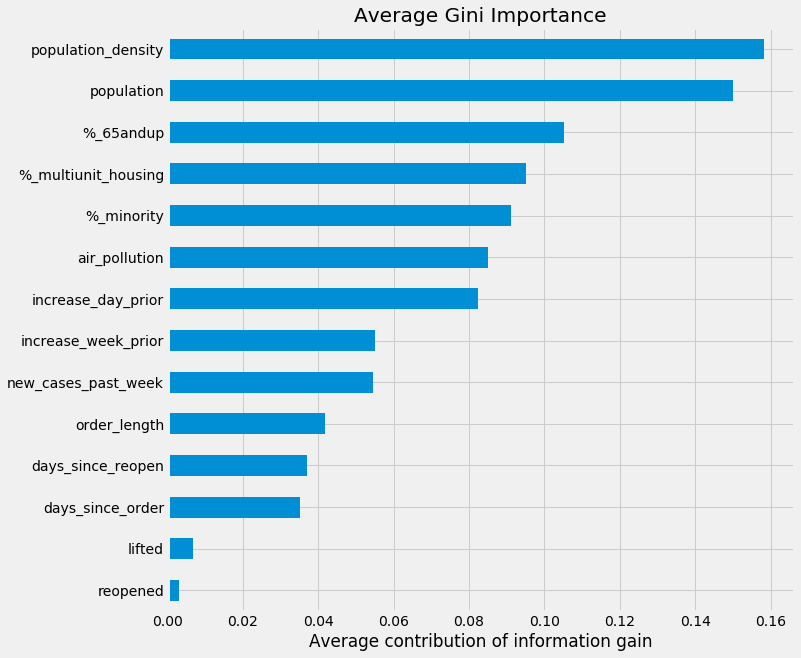

In [142]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(10,10))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

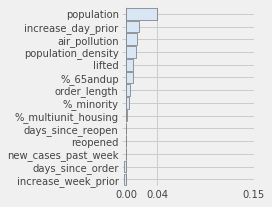

In [135]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [136]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[383,  78],
       [105, 220]])

In [137]:
precision_score(y_test, rfc.predict(X_test))

0.738255033557047

In [138]:
recall_score(y_test, rfc.predict(X_test))

0.676923076923077

In [139]:
estimator_list = [50, 75, 100, 125, 150, 250]
score_list = []
for i in estimator_list:
    rfc1 = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc1.fit(X_train, y_train)
    score_list.append(rfc1.score(X_test, y_test))
estimator_scores = dict(zip(estimator_list, score_list))
estimator_scores

{50: 0.7582697201017812,
 75: 0.7506361323155216,
 100: 0.7620865139949109,
 125: 0.7569974554707379,
 150: 0.7582697201017812,
 250: 0.7569974554707379}

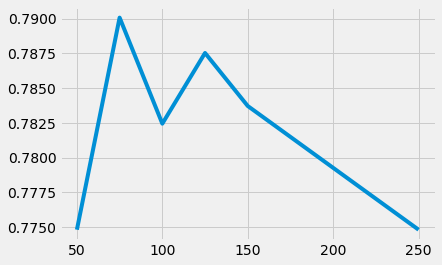

In [101]:
x = estimator_list
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)

In [102]:
max_features = []
score_list = []
for i in range(1, len(X.columns)):
    rfc2 = RandomForestClassifier(max_features=i, oob_score=True)
    rfc2.fit(X_train, y_train)
    score_list.append(rfc2.score(X_test, y_test))
    max_features.append(i)
feature_scores = dict(zip(max_features, score_list))
feature_scores

{1: 0.7913486005089059,
 2: 0.7926208651399491,
 3: 0.787531806615776,
 4: 0.7811704834605598,
 5: 0.7760814249363868,
 6: 0.77735368956743,
 7: 0.7798982188295165,
 8: 0.7709923664122137,
 9: 0.787531806615776,
 10: 0.7837150127226463,
 11: 0.7798982188295165,
 12: 0.7760814249363868,
 13: 0.7786259541984732}

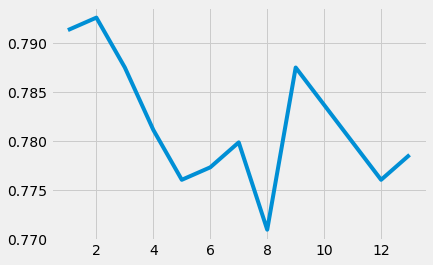

In [103]:
x = max_features
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)